In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [2]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

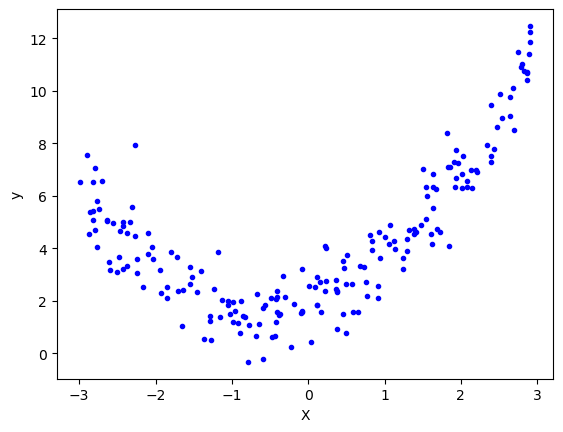

In [3]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [4]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
# Applying linear regression
lr = LinearRegression()

In [6]:
lr.fit(X_train,y_train)

LinearRegression()

In [7]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.08295078617505924

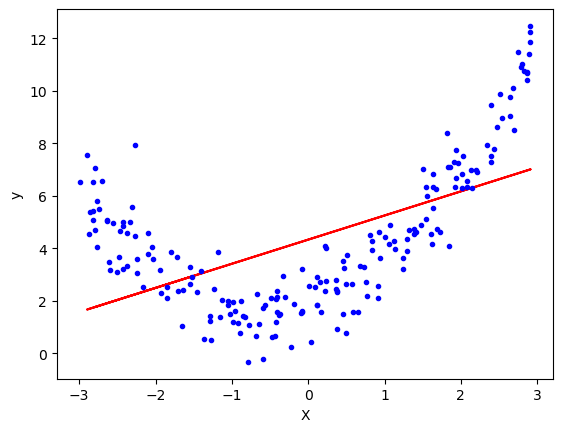

In [8]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [9]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [10]:
print(X_train[0])
print(X_train_trans[0])

[-2.78916196]
[ 1.         -2.78916196  7.77942442]


In [11]:
# include_bias parameter

In [12]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(X_test_trans)

In [14]:
r2_score(y_test,y_pred)

0.8715127468034085

In [15]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.91503432 0.79545259]]
[1.85405778]


In [16]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

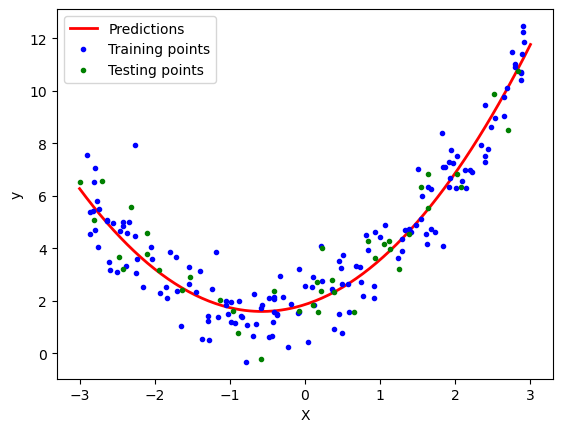

In [17]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [18]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

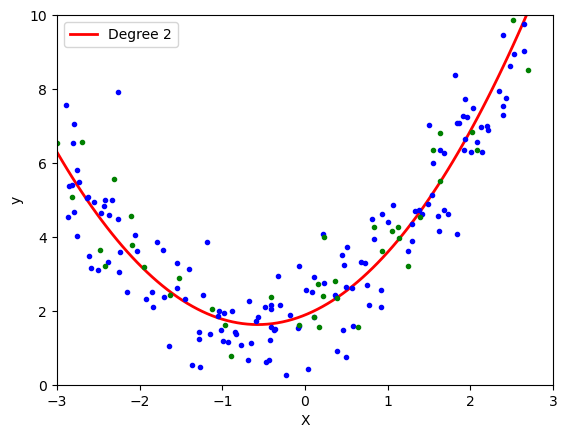

In [23]:
polynomial_regression(2)

In [24]:
poly.powers_

array([[0],
       [1],
       [2]], dtype=int64)

C:\Users\Musadaq Tanvir\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


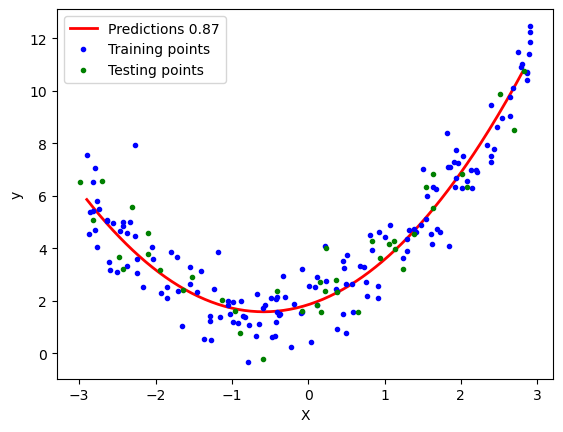

In [25]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [27]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [46]:
z

array([[ 8.77994043],
       [18.06946209],
       [ 3.85315625],
       [ 6.22236033],
       [ 6.51027247],
       [12.08319885],
       [ 5.20647984],
       [ 8.29621625],
       [ 6.74591733],
       [10.20521867],
       [23.39995589],
       [30.02255205],
       [ 3.9587987 ],
       [11.75880864],
       [ 5.3614803 ],
       [11.89954155],
       [-0.06784556],
       [ 5.56699796],
       [ 9.7439544 ],
       [ 7.41978816],
       [17.23327485],
       [ 6.26160012],
       [28.52453529],
       [11.67549291],
       [ 1.98669992],
       [18.41467143],
       [ 1.92210418],
       [ 8.21661062],
       [ 8.14670255],
       [ 6.20299831],
       [ 9.57250758],
       [ 7.82765719],
       [18.42040214],
       [18.50088144],
       [ 5.02686402],
       [ 6.86635082],
       [30.3267909 ],
       [23.55484363],
       [17.42628807],
       [ 1.79638212],
       [13.7418988 ],
       [ 3.32919088],
       [ 3.31559574],
       [ 7.60310445],
       [ 6.38332172],
       [ 8

In [48]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [30]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)



In [31]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [53]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [61]:
poly = PolynomialFeatures(degree=2)
X_multi_trans = poly.fit_transform(X_multi)

In [62]:
print("Input",poly.n_features_in_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Input 2
Ouput 6
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [56]:
X_multi_trans.shape

(100, 10)

In [57]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [58]:
X_test_multi = poly.transform(final)

In [59]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [60]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()